In [113]:
import pandas as pd

# Закидываю csv файл 
# data-20190513t1220-structure-20190513t1220.csv

In [114]:
dataFile = '/content/data-20190513t1220-structure-20190513t1220.csv'

df = pd.read_csv(dataFile)

df = df.fillna(0) # Замена всех NaN на " ". Для отображения в HTML
df

,Unnamed: 0,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Количество малых предприятий (ед.),310.0,386.00,484.0,739.0,622.0,622.0,600.0,632.0,561.0,584.0,498.0
1,Количество микропредприятий(ед.),2212.0,3512.00,3458.0,6046.0,6190.0,5999.0,6506.0,5646.0,5646.0,4820.0,4688.0
2,Количество средних предприятий(ед.),63.0,81.00,108.0,96.0,102.0,89.0,72.0,83.0,93.0,73.0,75.0
3,Количество индивидуальных предпринимателей (ед.),15352.0,16458.00,17149.0,18109.0,19425.0,17820.0,17431.0,16946.0,16744.0,16271.0,16164.0
4,Среднеспичочная численность малых предприятий ...,10568.0,11818.00,17039.0,16192.0,15277.0,15699.0,15230.0,15502.0,15460.0,16015.0,15770.0
5,Среднеспичочная численность микропредприятий (...,13432.0,10366.00,8741.0,6846.0,7689.0,7747.0,7804.0,7804.0,9682.0,9414.0,10371.0
6,Среднеспичочная численность средних предприяти...,6300.0,8561.00,7621.0,9927.0,9072.0,8260.0,6383.0,6349.0,7760.0,6001.0,6015.0
7,Инвестиции в основной капитал малых предприяти...,66903.0,47562.44,911814.0,2536622.0,823100.0,197194.0,127428.0,80900.0,114300.0,2623378.0,753948.0
8,Инвестиции в основной капитал микропредприятий...,470305.0,32410.90,407784.0,41670.0,55108.0,44093.0,130690.0,130690.0,177987.0,292880.0,415355.0
9,Инвестиции в основной капитал средних предприя...,0.0,0.00,0.0,829700.0,1061000.0,689400.0,1298400.0,1298400.0,1314700.0,904000.0,905000.0


# Создаю таблицу для сайта

In [115]:
# Подключаем библиотеки для работы с выводом HTML в Colab
from IPython.display import display, HTML, IFrame

In [116]:
headers = "<tr>"
for key in list(df):
    headers += "<th>"+key+"</th>\n"
headers += "</tr>"

# Чтобы был пропуск в уголке
headers = headers.replace('Unnamed: 0', ' ')

table = ''

for row, values in df.iterrows():
  table += "<tr>"
  for i in values:
    table += f'<td> {i} </td>'
  table += "</tr>"

# Отображение заголовков + строк в виде единой HTML таблицы
display(HTML("<h1>Показатели развития предпринимательства</h1><table border=1 cellpadding=10>"+headers+table+"</table>"))

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Количество малых предприятий (ед.),310.0,386.0,484.0,739.0,622.0,622.0,600.0,632.0,561.0,584.0,498.0
Количество микропредприятий(ед.),2212.0,3512.0,3458.0,6046.0,6190.0,5999.0,6506.0,5646.0,5646.0,4820.0,4688.0
Количество средних предприятий(ед.),63.0,81.0,108.0,96.0,102.0,89.0,72.0,83.0,93.0,73.0,75.0
Количество индивидуальных предпринимателей (ед.),15352.0,16458.0,17149.0,18109.0,19425.0,17820.0,17431.0,16946.0,16744.0,16271.0,16164.0
Среднеспичочная численность малых предприятий (чел.),10568.0,11818.0,17039.0,16192.0,15277.0,15699.0,15230.0,15502.0,15460.0,16015.0,15770.0
Среднеспичочная численность микропредприятий (чел.),13432.0,10366.0,8741.0,6846.0,7689.0,7747.0,7804.0,7804.0,9682.0,9414.0,10371.0
Среднеспичочная численность средних предприятий (чел.),6300.0,8561.0,7621.0,9927.0,9072.0,8260.0,6383.0,6349.0,7760.0,6001.0,6015.0
Инвестиции в основной капитал малых предприятий (тыс.руб.),66903.0,47562.44,911814.0,2536622.0,823100.0,197194.0,127428.0,80900.0,114300.0,2623378.0,753948.0
Инвестиции в основной капитал микропредприятий (тыс.руб.),470305.0,32410.9,407784.0,41670.0,55108.0,44093.0,130690.0,130690.0,177987.0,292880.0,415355.0
Инвестиции в основной капитал средних предприятий (тыс.руб.),0.0,0.0,0.0,829700.0,1061000.0,689400.0,1298400.0,1298400.0,1314700.0,904000.0,905000.0


# Создание графика Изменения числа малых, микро и средних предприятий

По оси х - даты   
По оси у - количество

In [117]:
# 1) Сбор данных для всех линий графиков
data_for_each = []
for ind, values in df.iterrows(): 
    data_for_each.append(values.values[1:])
    if ind == 3:
        break

cols = ['малых_предприятий', 'микро_предприятий', 'средних_предприятий', 'индивидуальных_предпринимателей']
data_for_each

[array([310.0, 386.0, 484.0, 739.0, 622.0, 622.0, 600.0, 632.0, 561.0,
        584.0, 498.0], dtype=object),
 array([2212.0, 3512.0, 3458.0, 6046.0, 6190.0, 5999.0, 6506.0, 5646.0,
        5646.0, 4820.0, 4688.0], dtype=object),
 array([63.0, 81.0, 108.0, 96.0, 102.0, 89.0, 72.0, 83.0, 93.0, 73.0, 75.0],
       dtype=object),
 array([15352.0, 16458.0, 17149.0, 18109.0, 19425.0, 17820.0, 17431.0,
        16946.0, 16744.0, 16271.0, 16164.0], dtype=object)]

In [118]:
# Сбор дат для оси х
dates = list(df)
del dates[0]
dates

['2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [119]:
# -- Тут использую matplotlib. 
# Чтобы её потом отображать на сайте сохраню в формат png

import matplotlib.pyplot as plt # Библиотека Matplotlib для отрсовки графиков
# Сообщаем о том, что мы хотим отображать графики непосредственно после
# выполнения кода. Необходимо, если Вы работаете в Colab или Jupyter Notebook
%matplotlib inline

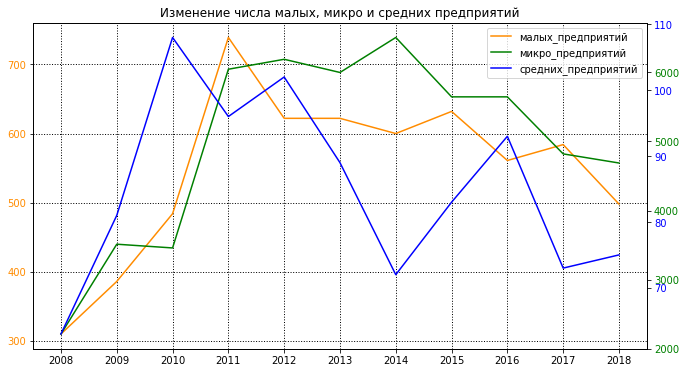

In [120]:
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot()

# Наносим надписи
ax.set_title("Изменение числа малых, микро и средних предприятий")

# Включаем отображение сетки
ax.grid(color = 'black',   #  цвет линий
        linewidth = 1,       #  толщина
        linestyle = ':')     #  начертание


# Отрисовываем график линейной зависимости
line1 = ax.plot(dates, data_for_each[0], color='darkorange', label = cols[0])
ax.tick_params(axis='y', labelcolor='darkorange')

# На основе поля с первым графиком рисуем второй
ax2 = ax.twinx()

line2 = ax2.plot(dates, data_for_each[1], color='green', label = cols[1]) 
ax2.tick_params(axis='y', labelcolor='green')


# # На основе поля с первым графиком рисуем третий
ax3 = ax.twinx()
line3 = ax3.plot(dates, data_for_each[2], color='blue', label = cols[2]) 
ax3.tick_params(axis='y', labelcolor='blue')


# Создание общей легенды для всех графиков
lines = line1 + line2 + line3
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc=0)

# Сохранение в png
plt.savefig('Изменение числа малых, микро и средних предприятий.png')

# Создание графика изменение числа индивидуальных предпринимателей

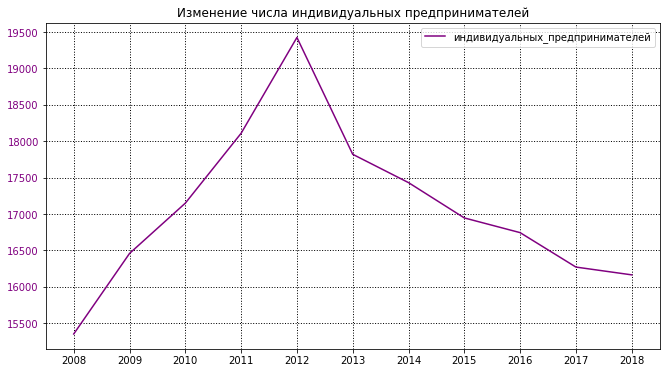

In [121]:
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot()

# Наносим надписи
ax.set_title("Изменение числа индивидуальных предпринимателей")

# Включаем отображение сетки
ax.grid(color = 'black',   #  цвет линий
        linewidth = 1,       #  толщина
        linestyle = ':')     #  начертание

# Отрисовываем график линейной зависимости
ax.plot(dates, data_for_each[3], color='purple', label = cols[3])
ax.tick_params(axis='y', labelcolor='purple')
ax.legend()

# Сохранение в png
plt.savefig('Изменение числа индивидуальных предпринимателей.png')

# Создаю диаграмму

In [122]:
# 2) Сделать одну столбчатую диаграмму, на которой
# отобразить инвестиции в основной капитал малых, микро и средних предприятий

In [123]:
# Суммирование данных в строках с индексами 7-9 включительно
names = []
sums_investments = []
for ind, values in df.iterrows(): 
    # Пропуск ненужных строк
    if ind < 7: continue
    names.append(values[0])
    sums_investments.append(sum(values.values[1:]))
    # print(values[0], sums_investments)
    if ind == 9: break

print(names)
print(sums_investments)

['Инвестиции в основной капитал малых предприятий (тыс.руб.)', 'Инвестиции в основной капитал микропредприятий (тыс.руб.)', 'Инвестиции в основной капитал средних предприятий (тыс.руб.)']
[8283149.4399999995, 2198972.9, 8300600.0]


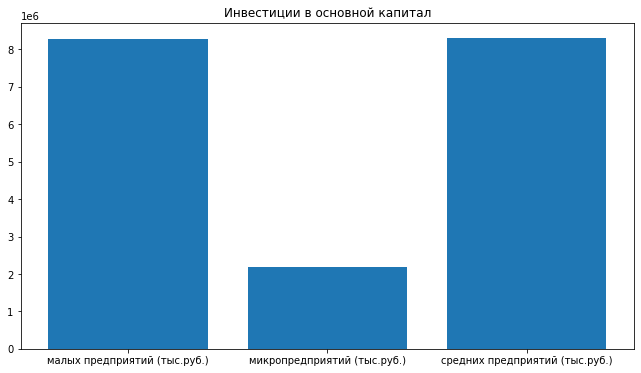

In [125]:
names = [name[20:] for name in names]

plt.figure(figsize=(11, 6))

# Наносим надписи
plt.title("Инвестиции в основной капитал")

# Стандартная столбчатая диаграмма
plt.bar(names, sums_investments)

# Сохранение в png
plt.savefig('Инвестиции в капитал.png')